# **Import Libraries and modules**

In [1]:
# https://keras.io/
#!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#Imports

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Dropout
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
#Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


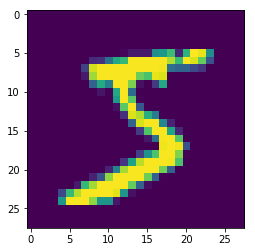

In [4]:
#View MNIST images
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshape the data to have pixel,pixel,channels format

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Normalize pixels to be between 0,1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [121]:
#Model architecture

from keras.layers import Activation

model = Sequential()

#Start with small kernels and buld up more
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))

model.add(Convolution2D(14, 3, 3, activation='relu'))

#Added maxpool to reduce number of layers and parameters
model.add(MaxPooling2D(2, 2))

#model.add(Convolution2D(10, 1, 1, activation='relu'))

model.add(Convolution2D(15, 3, 3, activation='relu'))
#Tried using 20% no use.
model.add(Dropout(0.4))

model.add(Convolution2D(18, 3, 3, activation='relu'))

model.add(Convolution2D(22, 3, 3, activation='relu'))

model.add(Convolution2D(30, 3, 3, activation='relu'))


model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(22, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), act

In [122]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_306 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 24, 24, 14)        1022      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 12, 12, 14)        0         
_________________________________________________________________
conv2d_308 (Conv2D)          (None, 10, 10, 15)        1905      
_________________________________________________________________
dropout_19 (Dropout)         (None, 10, 10, 15)        0         
_________________________________________________________________
conv2d_309 (Conv2D)          (None, 8, 8, 18)          2448      
_________________________________________________________________
conv2d_310 (Conv2D)          (None, 6, 6, 22)          3586      
__________

In [0]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("assign3_eva.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [124]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20,validation_data=(X_test,Y_test) ,verbose=1, callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.2585 - acc: 0.9190 - val_loss: 0.0851 - val_acc: 0.9738

Epoch 00001: val_acc improved from -inf to 0.97380, saving model to assign3_eva.hdf5
Epoch 2/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.0865 - acc: 0.9729 - val_loss: 0.0534 - val_acc: 0.9823

Epoch 00002: val_acc improved from 0.97380 to 0.98230, saving model to assign3_eva.hdf5
Epoch 3/20
60000/60000 [==============================] - 21s 344us/step - loss: 0.0651 - acc: 0.9800 - val_loss: 0.0416 - val_acc: 0.9863

Epoch 00003: val_acc improved from 0.98230 to 0.98630, saving model to assign3_eva.hdf5
Epoch 4/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.0543 - acc: 0.9832 - val_loss: 0.0370 - val_acc: 0.9873

Epoch 00004: val_acc improved from 0.98630 to 0.98730, saving model to assign3_eva.hdf5
Epoch 5/20
60000/60000 [=================

In [125]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20,validation_data=(X_test,Y_test) ,verbose=1, callbacks=[checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
  608/60000 [..............................] - ETA: 18s - loss: 0.0051 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 20s 340us/step - loss: 0.0175 - acc: 0.9941 - val_loss: 0.0355 - val_acc: 0.9914

Epoch 00001: val_acc did not improve from 0.99220
Epoch 2/20
60000/60000 [==============================] - 21s 347us/step - loss: 0.0178 - acc: 0.9943 - val_loss: 0.0318 - val_acc: 0.9915

Epoch 00002: val_acc did not improve from 0.99220
Epoch 3/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.0172 - acc: 0.9941 - val_loss: 0.0427 - val_acc: 0.9901

Epoch 00003: val_acc did not improve from 0.99220
Epoch 4/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.0179 - acc: 0.9944 - val_loss: 0.0305 - val_acc: 0.9925

Epoch 00004: val_acc improved from 0.99220 to 0.99250, saving model to assign3_eva.hdf5
Epoch 5/20
60000/60000 [==============================] - 21s 343us/step - loss: 0.0152 - acc: 0.9948 - val_loss: 0.0402 - val_acc: 0.9901

Epoch 00005: val_acc did not improve from 0.99250
Epoch 6/20
60000/60000 

In [0]:
from keras.models import load_model

In [0]:
model.load_weights("assign3_eva.hdf5")

In [0]:
#Scoring the model
#Below there is another architecture with 99.4% accuracy
score = model.evaluate(X_test, Y_test, verbose=0)

In [132]:
print(score)

[0.032482769957925664, 0.993]


In [141]:
from keras.layers import Activation

model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))

model.add(Convolution2D(14, 3, 3, activation='relu'))

model.add(MaxPooling2D(2, 2))

model.add(Convolution2D(10, 1, 1, activation='relu'))

model.add(Convolution2D(14, 3, 3, activation='relu'))

model.add(Dropout(0.4))


model.add(Convolution2D(18, 3, 3, activation='relu'))

model.add(Convolution2D(22, 3, 3, activation='relu'))
#added an extra dropout.
model.add(Dropout(0.4))

model.add(Convolution2D(32, 3, 3, activation='relu'))


model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_352 (Conv2D)          (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_353 (Conv2D)          (None, 24, 24, 14)        1022      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 12, 12, 14)        0         
_________________________________________________________________
conv2d_354 (Conv2D)          (None, 12, 12, 10)        150       
_________________________________________________________________
conv2d_355 (Conv2D)          (None, 10, 10, 14)        1274      
_________________________________________________________________
dropout_25 (Dropout)         (None, 10, 10, 14)        0         
_________________________________________________________________
conv2d_356 (Conv2D)          (None, 8, 8, 18)          2286      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(14, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API:

In [142]:
checkpoint = ModelCheckpoint("assign3_eva.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=20,validation_data=(X_test,Y_test) ,verbose=1, callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.3019 - acc: 0.9029 - val_loss: 0.0770 - val_acc: 0.9745

Epoch 00001: val_acc improved from -inf to 0.97450, saving model to assign3_eva.hdf5
Epoch 2/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.1010 - acc: 0.9684 - val_loss: 0.0495 - val_acc: 0.9825

Epoch 00002: val_acc improved from 0.97450 to 0.98250, saving model to assign3_eva.hdf5
Epoch 3/20
60000/60000 [==============================] - 23s 387us/step - loss: 0.0782 - acc: 0.9760 - val_loss: 0.0410 - val_acc: 0.9861

Epoch 00003: val_acc improved from 0.98250 to 0.98610, saving model to assign3_eva.hdf5
Epoch 4/20
60000/60000 [==============================] - 23s 383us/step - loss: 0.0652 - acc: 0.9795 - val_loss: 0.0371 - val_acc: 0.9883

Epoch 00004: val_acc improved from 0.98610 to 0.98830, saving model to assign3_eva.hdf5
Epoch 5/20
60000/60000 [=================

In [143]:
model.load_weights("assign3_eva.hdf5")
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.021776308365410658, 0.9941]


In [0]:
#Getting validation predictions
y_pred = model.predict(X_test)

In [145]:
print(y_pred[:9])
print(y_test[:9])

[[1.15929098e-12 1.09985010e-07 4.70560479e-08 2.54800426e-07
  2.50827470e-10 1.61337887e-09 7.05741865e-19 9.99998927e-01
  1.68205644e-10 7.33622016e-07]
 [4.92008567e-09 5.61749766e-06 9.99994397e-01 7.34944952e-11
  1.46445469e-08 3.31810690e-11 2.27148647e-08 6.25912544e-10
  3.23865272e-08 1.92182416e-11]
 [8.59001315e-09 9.99996781e-01 3.53170932e-08 1.38281764e-09
  3.56856418e-07 1.20124514e-06 8.25295032e-09 8.22580205e-07
  7.54534028e-07 4.34137668e-08]
 [9.99913454e-01 7.21441587e-11 4.15912744e-08 2.67801909e-07
  1.10820042e-06 2.06117790e-07 7.54022331e-05 2.94093128e-09
  6.28729867e-06 3.15544025e-06]
 [1.47510476e-11 1.60935931e-10 2.76267142e-09 1.08773615e-11
  9.97757375e-01 2.17995755e-09 6.17427276e-10 1.87109439e-08
  1.39947520e-06 2.24126386e-03]
 [2.56675903e-09 9.99998808e-01 4.56472691e-08 3.34973382e-10
  2.15904237e-07 2.92644586e-07 1.22944632e-09 2.69969348e-07
  3.57795955e-07 4.38264323e-08]
 [9.11114166e-16 6.09108639e-08 4.86725398e-08 3.62779529e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

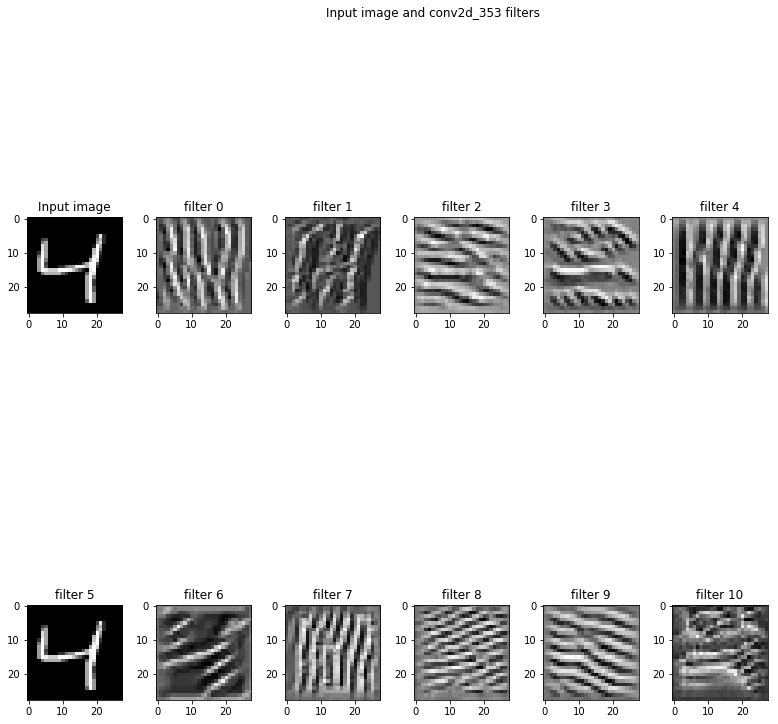

In [164]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_353'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
            
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 4, 4
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

IndexError: ignored

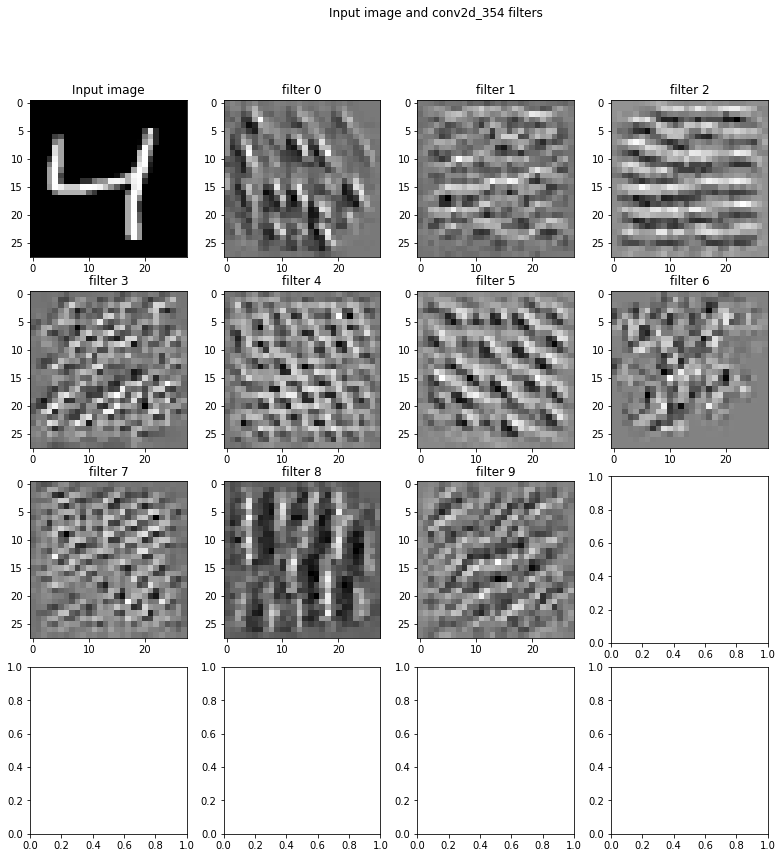

In [166]:
vis_img_in_filter(layer_name="conv2d_354")

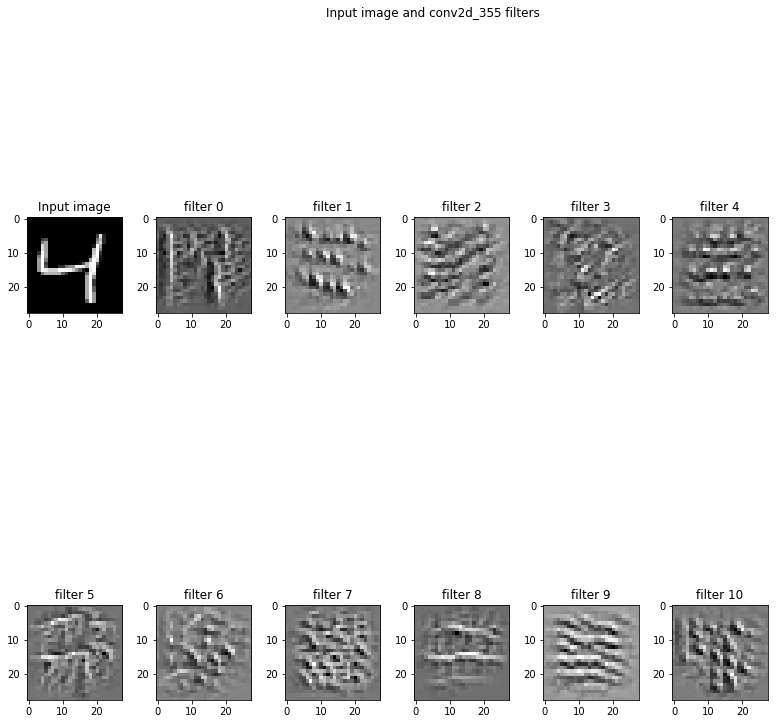

In [159]:
img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64)

vis_img_in_filter(layer_name="conv2d_355")

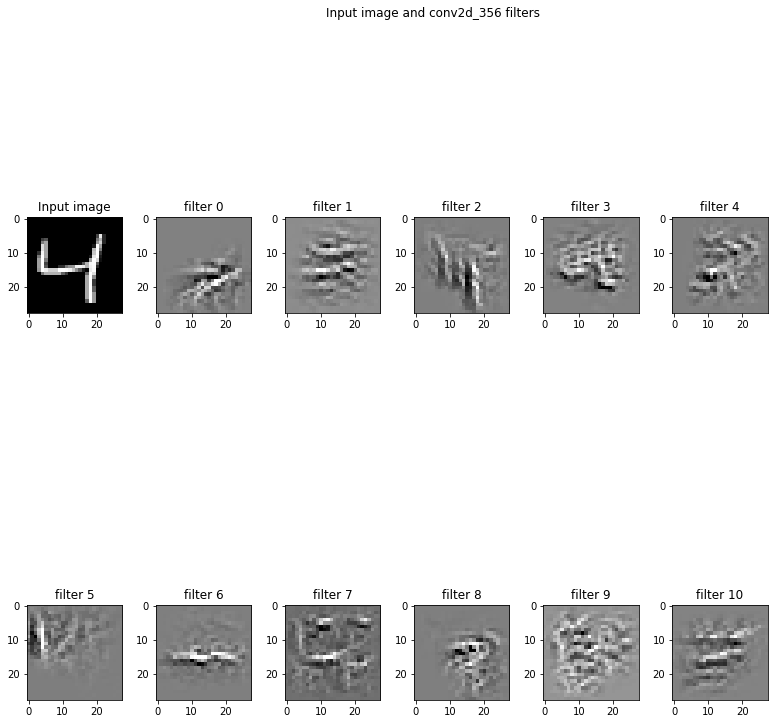

In [160]:
vis_img_in_filter(layer_name="conv2d_356")

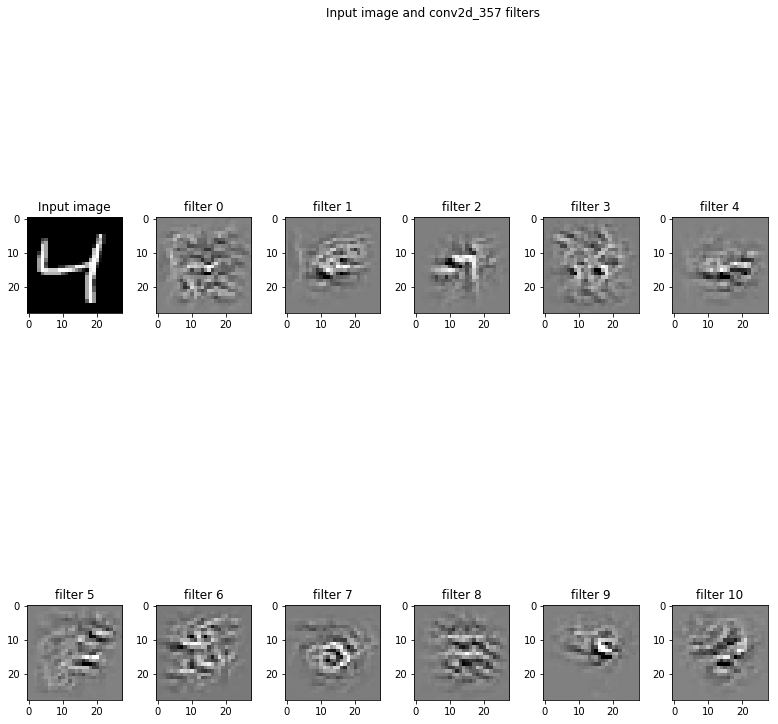

In [161]:
vis_img_in_filter(layer_name="conv2d_357")

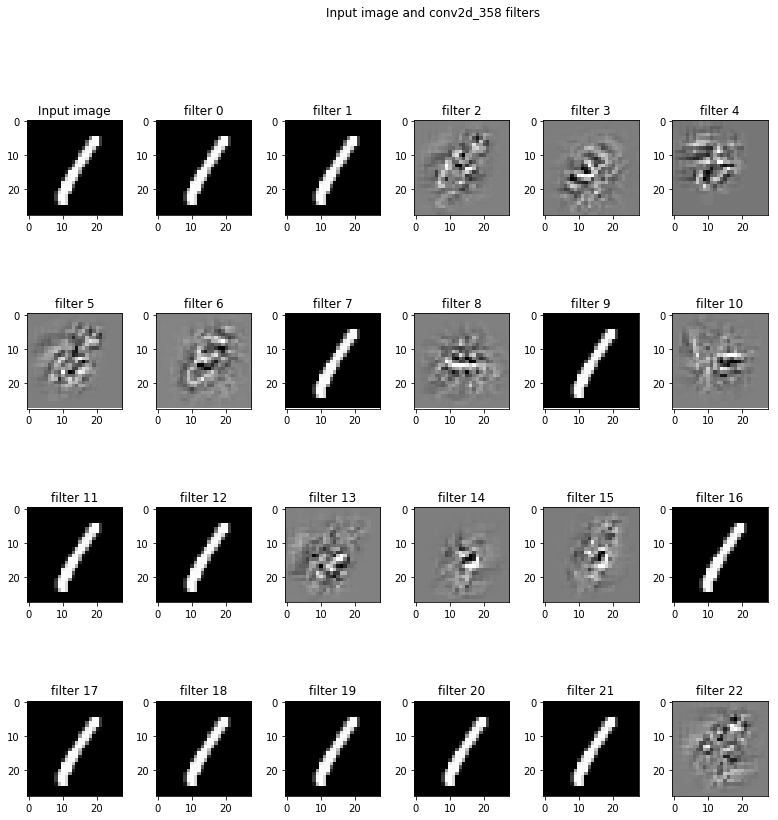

In [167]:
vis_img_in_filter(img=img, layer_name="conv2d_358")

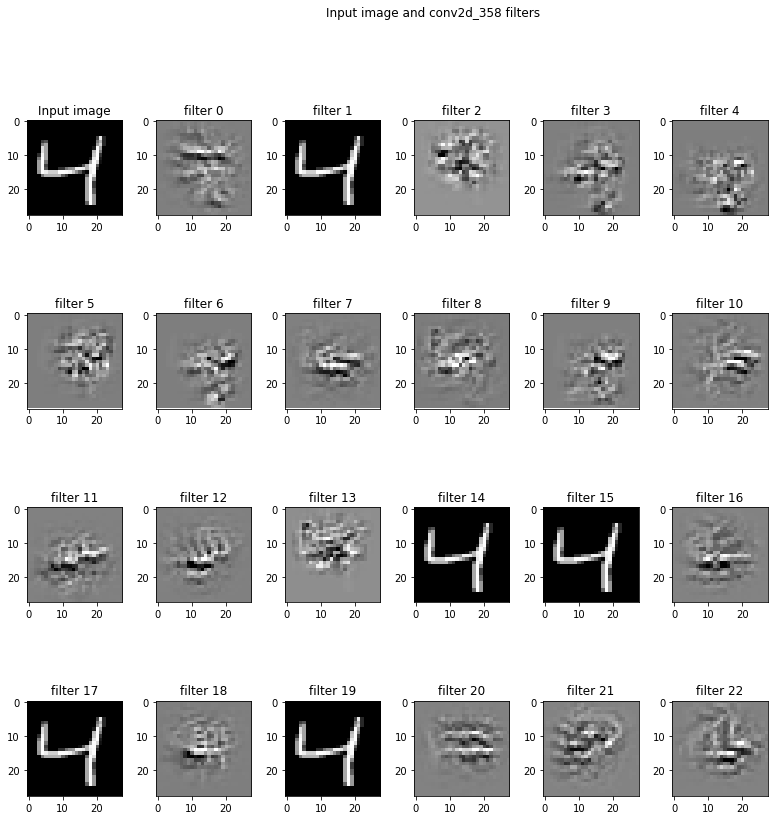

In [162]:
vis_img_in_filter(layer_name="conv2d_358")

IndexError: ignored

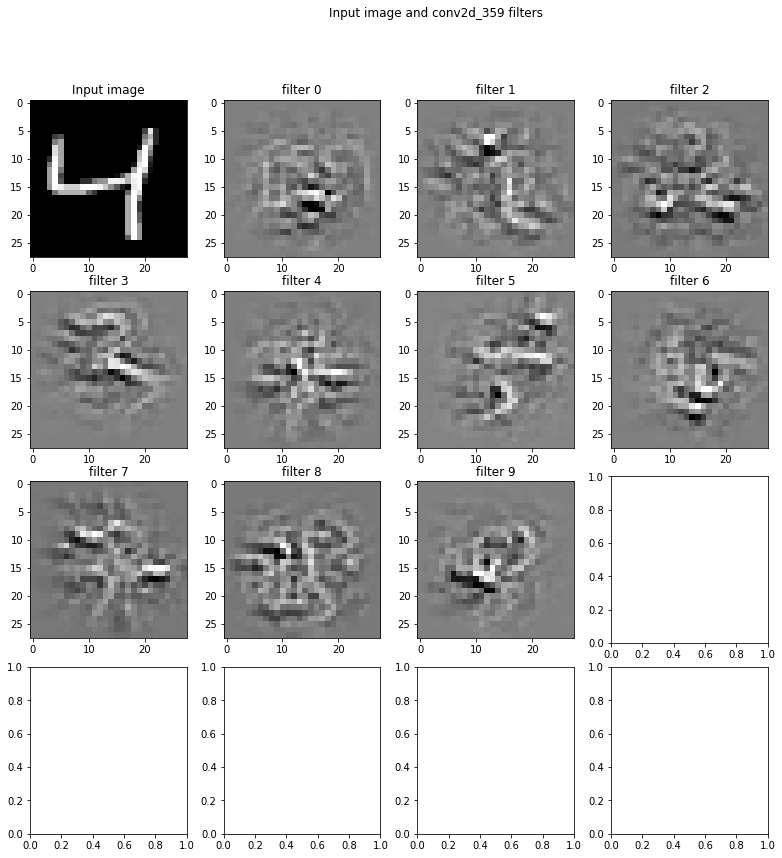

In [165]:
vis_img_in_filter(layer_name="conv2d_359")